## Load libraries, parameters and data

In [74]:
!sudo pip install torchvision -q 
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
%matplotlib inline

#torch.cuda.set_device(1)

In [75]:
param = {'batch_size' : 64,
         'noise_dim' : 50,
        'test_batch_size' : 1000,
        'lr' : 0.01,
        'momentum' : 0.5,
        'log_interval' : 1}

In [76]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=param['batch_size'], shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=param['test_batch_size'], shuffle=True)

torch.Size([28, 28])


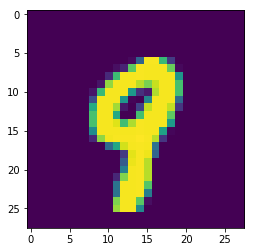

In [77]:
for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.cuda(), target.cuda()
    batch_idx
    break

print(data[0,0].shape)
plt.imshow(data[0,0].cpu().numpy())


## Models

In [78]:
data.shape

torch.Size([64, 1, 28, 28])

In [79]:
data.view(64,-1).shape

torch.Size([64, 784])

In [80]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28*28,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,1)
        
    def forward(self,x):
        out = x.view(-1,28*28)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return (out)
    
class Generator(nn.Module):
    def __init__(self,noise_dim= param['noise_dim'], out_dim = 28*28):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(noise_dim,out_dim)
        self.fc2 = nn.Linear(out_dim,out_dim)
        self.fc3 = nn.Linear(out_dim,out_dim)
    def forward(self,x):
        out = (self.fc1(x))
        out = F.tanh(self.fc2(out))
        out = F.tanh(self.fc3(out))
        out = out.view(-1,28,28)
        return out

In [81]:
d = Discriminator()
d.cuda()

g = Generator()
g.cuda()


Generator (
  (fc1): Linear (50 -> 784)
  (fc2): Linear (784 -> 784)
  (fc3): Linear (784 -> 784)
)

In [82]:
z = Variable(torch.randn(5, param['noise_dim']).cuda())
print(z.data.shape)

torch.Size([5, 50])


In [83]:
g(z).data.shape

torch.Size([5, 28, 28])

In [84]:
x = Variable(data[0:5,0])
print(x.data.shape)
yhat = d(x)
#yhat.data.shape

torch.Size([5, 28, 28])


## Train

In [85]:
opt_d = optim.SGD(d.parameters(), lr=param['lr'])
opt_g = optim.SGD(g.parameters(), lr=param['lr'])

to_variable = lambda x: Variable(x.cuda())

In [86]:
### Train discriminator
def train_epoch():
    for i, [images,label] in enumerate(train_loader):
        z = to_variable(torch.randn(param['batch_size'], param['noise_dim']))
        x = to_variable(images)

        # Real images
        pred_real = d(x)
        real_loss = torch.mean((pred_real-1)**2)

        # Fake images
        pred_fake = d(g(z))
        fake_loss = torch.mean((pred_fake)**2)

        d_loss = fake_loss + real_loss
        opt_d.zero_grad()
        d_loss.backward()
        opt_d.step()

        ### Train generator
        z = to_variable(torch.randn(param['batch_size'], param['noise_dim']))
        fake_img = g(z)
        pred_fake = d(fake_img)
        g_loss = torch.mean( (pred_fake - 1)**2)

        opt_g.zero_grad()
        g_loss.backward()
        opt_g.step()

In [ ]:
fixed_noise = to_variable(torch.randn(param['batch_size'], param['noise_dim']))

epoch 0:


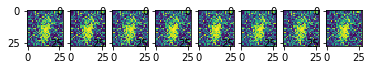

epoch 1:


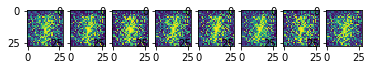

epoch 2:


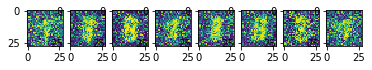

epoch 3:


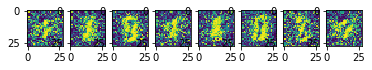

epoch 4:


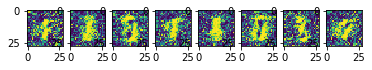

epoch 5:


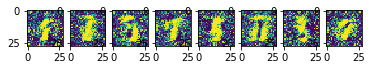

epoch 6:


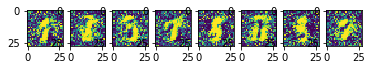

epoch 7:


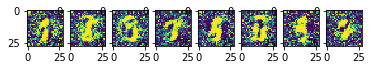

epoch 8:


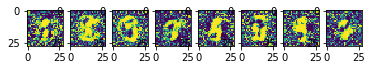

epoch 9:


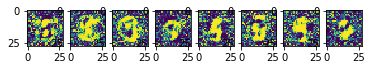

epoch 10:


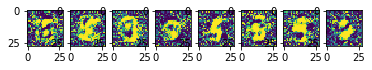

epoch 11:


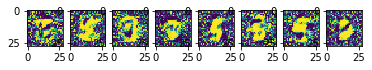

epoch 12:


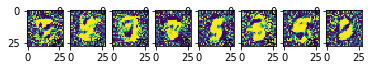

epoch 13:


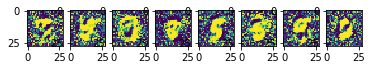

epoch 14:


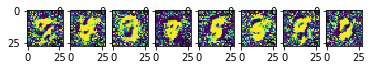

epoch 15:


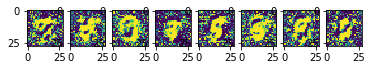

epoch 16:


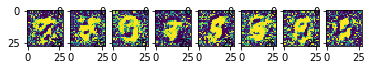

epoch 17:


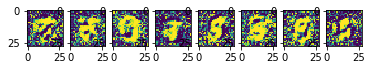

epoch 18:


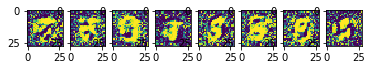

epoch 19:


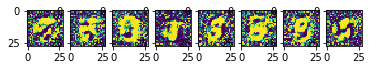

epoch 20:


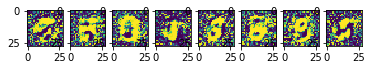

epoch 21:


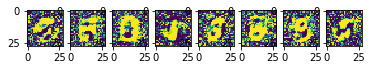

epoch 22:


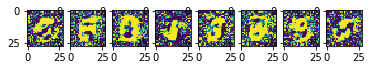

epoch 23:


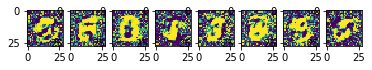

epoch 24:


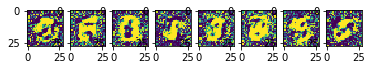

epoch 25:


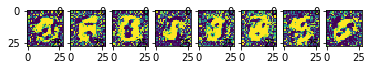

epoch 26:


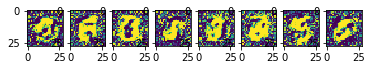

epoch 27:


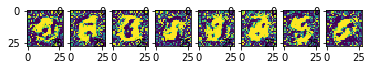

epoch 28:


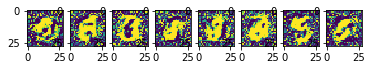

epoch 29:


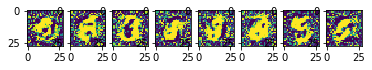

epoch 30:


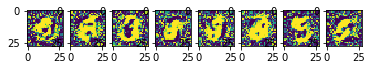

epoch 31:


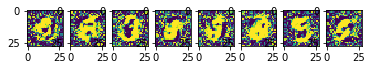

epoch 32:


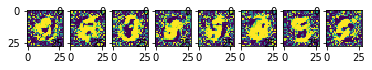

epoch 33:


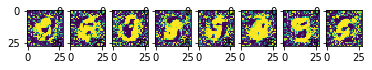

epoch 34:


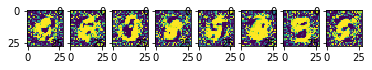

epoch 35:


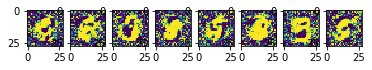

epoch 36:


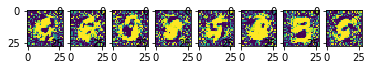

epoch 37:


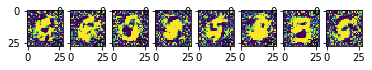

epoch 38:


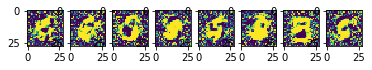

epoch 39:


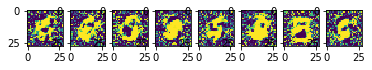

epoch 40:


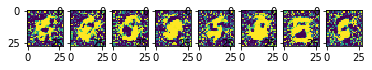

epoch 41:


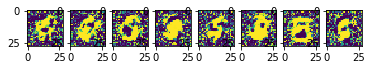

epoch 42:


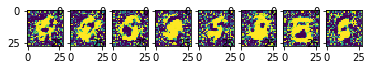

epoch 43:


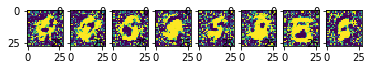

epoch 44:


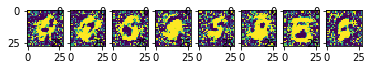

epoch 45:


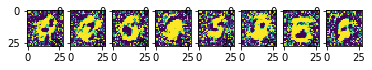

epoch 46:


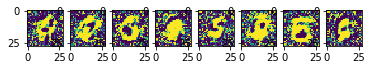

epoch 47:


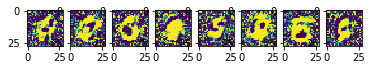

epoch 48:


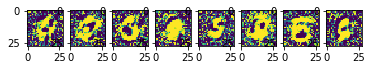

epoch 49:


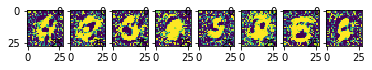

epoch 50:


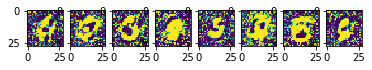

epoch 51:


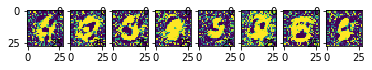

epoch 52:


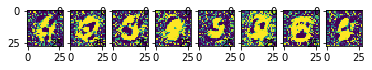

epoch 53:


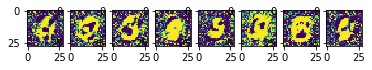

epoch 54:


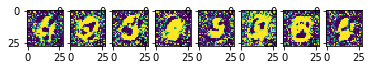

epoch 55:


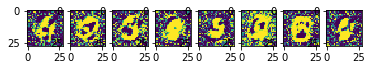

epoch 56:


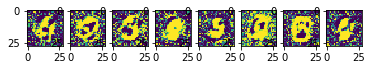

epoch 57:


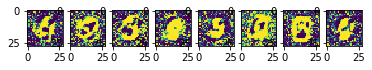

In [ ]:
def plot_images(fake_img):
    for i in range(1,9):
        plt.subplot(1,8,i)
        plt.imshow(fake_img[i,])
    plt.show()

for epoch in range(100):
    train_epoch()
    
    if epoch % 1 == 0:
        print("epoch %s:" % epoch)
        fake_img = g(fixed_noise).data.cpu().numpy()
        plot_images(fake_img)